In [137]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import silhouette_score
from tqdm import tqdm
import umap

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

В ДЗ использован датасет https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [38]:
df = pd.read_csv('creditcard.csv', sep=',')

In [39]:
df_anomal = df.loc[df['Class'] == 1]
df_reduced = df.sample(frac=0.1)

In [40]:
df_new = pd.concat([df_anomal, df_reduced], axis=0, ignore_index=True)

In [41]:
df = df_new.sample(frac=1).reset_index(drop=True)

In [42]:
df.shape

(28973, 31)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28973 entries, 0 to 28972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28973 non-null  float64
 1   V1      28973 non-null  float64
 2   V2      28973 non-null  float64
 3   V3      28973 non-null  float64
 4   V4      28973 non-null  float64
 5   V5      28973 non-null  float64
 6   V6      28973 non-null  float64
 7   V7      28973 non-null  float64
 8   V8      28973 non-null  float64
 9   V9      28973 non-null  float64
 10  V10     28973 non-null  float64
 11  V11     28973 non-null  float64
 12  V12     28973 non-null  float64
 13  V13     28973 non-null  float64
 14  V14     28973 non-null  float64
 15  V15     28973 non-null  float64
 16  V16     28973 non-null  float64
 17  V17     28973 non-null  float64
 18  V18     28973 non-null  float64
 19  V19     28973 non-null  float64
 20  V20     28973 non-null  float64
 21  V21     28973 non-null  float64
 22

In [44]:
rows = df.shape[0]
cols = df.shape[1]
numeric_rows = len(df.select_dtypes([np.number]).columns)

In [45]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,147682.0,-0.351113,1.270114,-0.486631,-0.670420,0.946421,-0.767365,1.186568,-0.636150,0.569428,...,0.258264,1.063350,-0.307061,-0.666650,-0.213594,-0.180595,-0.236744,0.007099,3.63,0
1,43006.0,1.381928,-0.523250,-0.167082,-0.811498,-0.490233,-0.659577,-0.243027,-0.307704,-0.997519,...,0.201303,0.450684,-0.277220,-0.389876,0.757129,-0.073438,-0.010581,0.013505,65.00,0
2,77598.0,1.377441,-1.392637,1.199127,-1.077220,-2.151707,-0.341421,-1.499293,0.001459,-1.070695,...,-0.216334,-0.128345,0.030003,0.394365,0.241177,-0.200487,0.073175,0.039906,52.00,0
3,82411.0,-0.378428,1.034512,0.424507,0.161931,-0.278660,-1.125367,0.652295,0.189762,-0.666478,...,0.103560,0.098556,0.060700,0.397526,-0.201165,0.261209,-0.137909,-0.032786,42.81,0
4,79734.0,-2.052239,0.405091,1.752122,-0.593583,-0.958570,-0.739725,-0.671108,0.926478,-0.049416,...,0.236006,0.365147,-0.170487,0.474714,0.269813,1.024385,-0.340131,-0.231333,2.00,0
5,62491.0,-0.869125,0.934088,0.390161,-1.882344,0.027863,-0.245028,-0.202496,-2.639536,0.220247,...,-1.030013,1.262288,-0.044062,0.240696,-0.352096,-0.857323,0.196569,0.200354,36.00,0
6,118334.0,1.890404,-0.023944,-1.858944,0.591679,0.182668,-1.381194,0.393736,-0.403517,0.540348,...,0.245135,0.714103,-0.101309,-0.144817,0.225775,-0.103765,-0.012179,-0.014911,87.50,0
7,96067.0,-0.206563,0.182231,-0.027830,-0.802690,0.732576,0.175020,0.822020,0.034248,1.671385,...,0.131131,0.566674,0.045319,0.138981,-0.583547,-0.032376,0.130107,0.213946,95.70,0
8,78993.0,-1.528777,0.258505,0.714807,-0.190688,-0.948731,-1.258390,1.637242,0.050366,-1.123065,...,0.259560,-0.023014,0.396908,0.962804,0.505890,1.063090,-0.295191,-0.036197,283.95,0
9,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1


In [46]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [47]:
print(f'Анализ датасета после работы с признаками: {rows} наблюдений и {cols} признак, все числовые')
print(f'Пропусков в данных нет')
print(f'Проверим количество наблюдений разных классов:')

Анализ датасета после работы с признаками: 28973 наблюдений и 31 признак, все числовые
Пропусков в данных нет
Проверим количество наблюдений разных классов:


In [48]:
df['Class'].value_counts()

0    28435
1      538
Name: Class, dtype: int64

In [49]:
def feature_plot_class(feature_class):
    print(f'Диаграммы распределения для Class={feature_class}')
    fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(18, 54))
    axes = axes.ravel()
    for feature_index, ax in enumerate(axes):
        ax.figure
        ax.hist(df[df.columns[feature_index]].loc[df['Class'] == feature_class], 100, alpha=1.0, label=f'Class={feature_class}', color="skyblue" if feature_class==0 else "orange")
        ax.legend(loc='upper right')
        ax.set_title(df.columns[feature_index])
    plt.tight_layout()
    plt.show()

Диаграммы распределения для Class=0


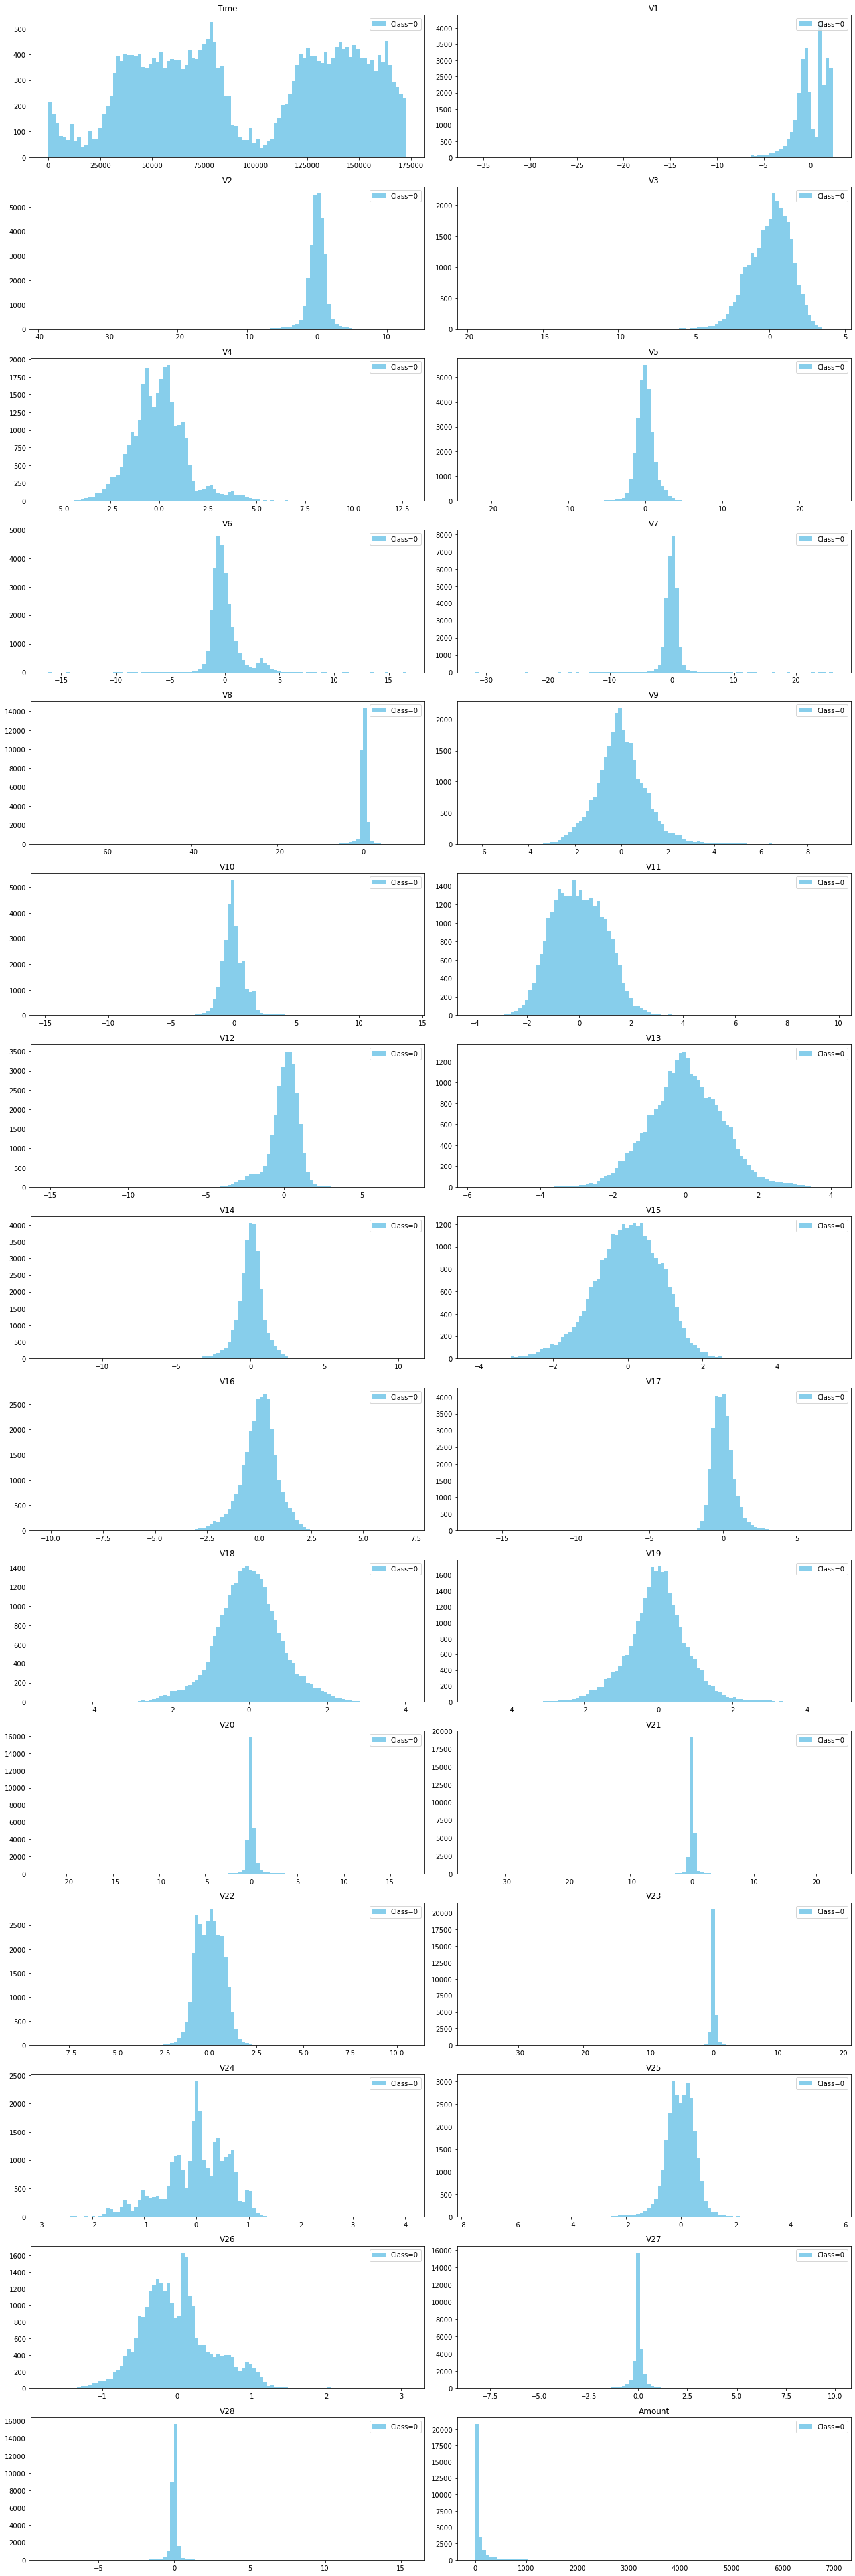

Диаграммы распределения для Class=1


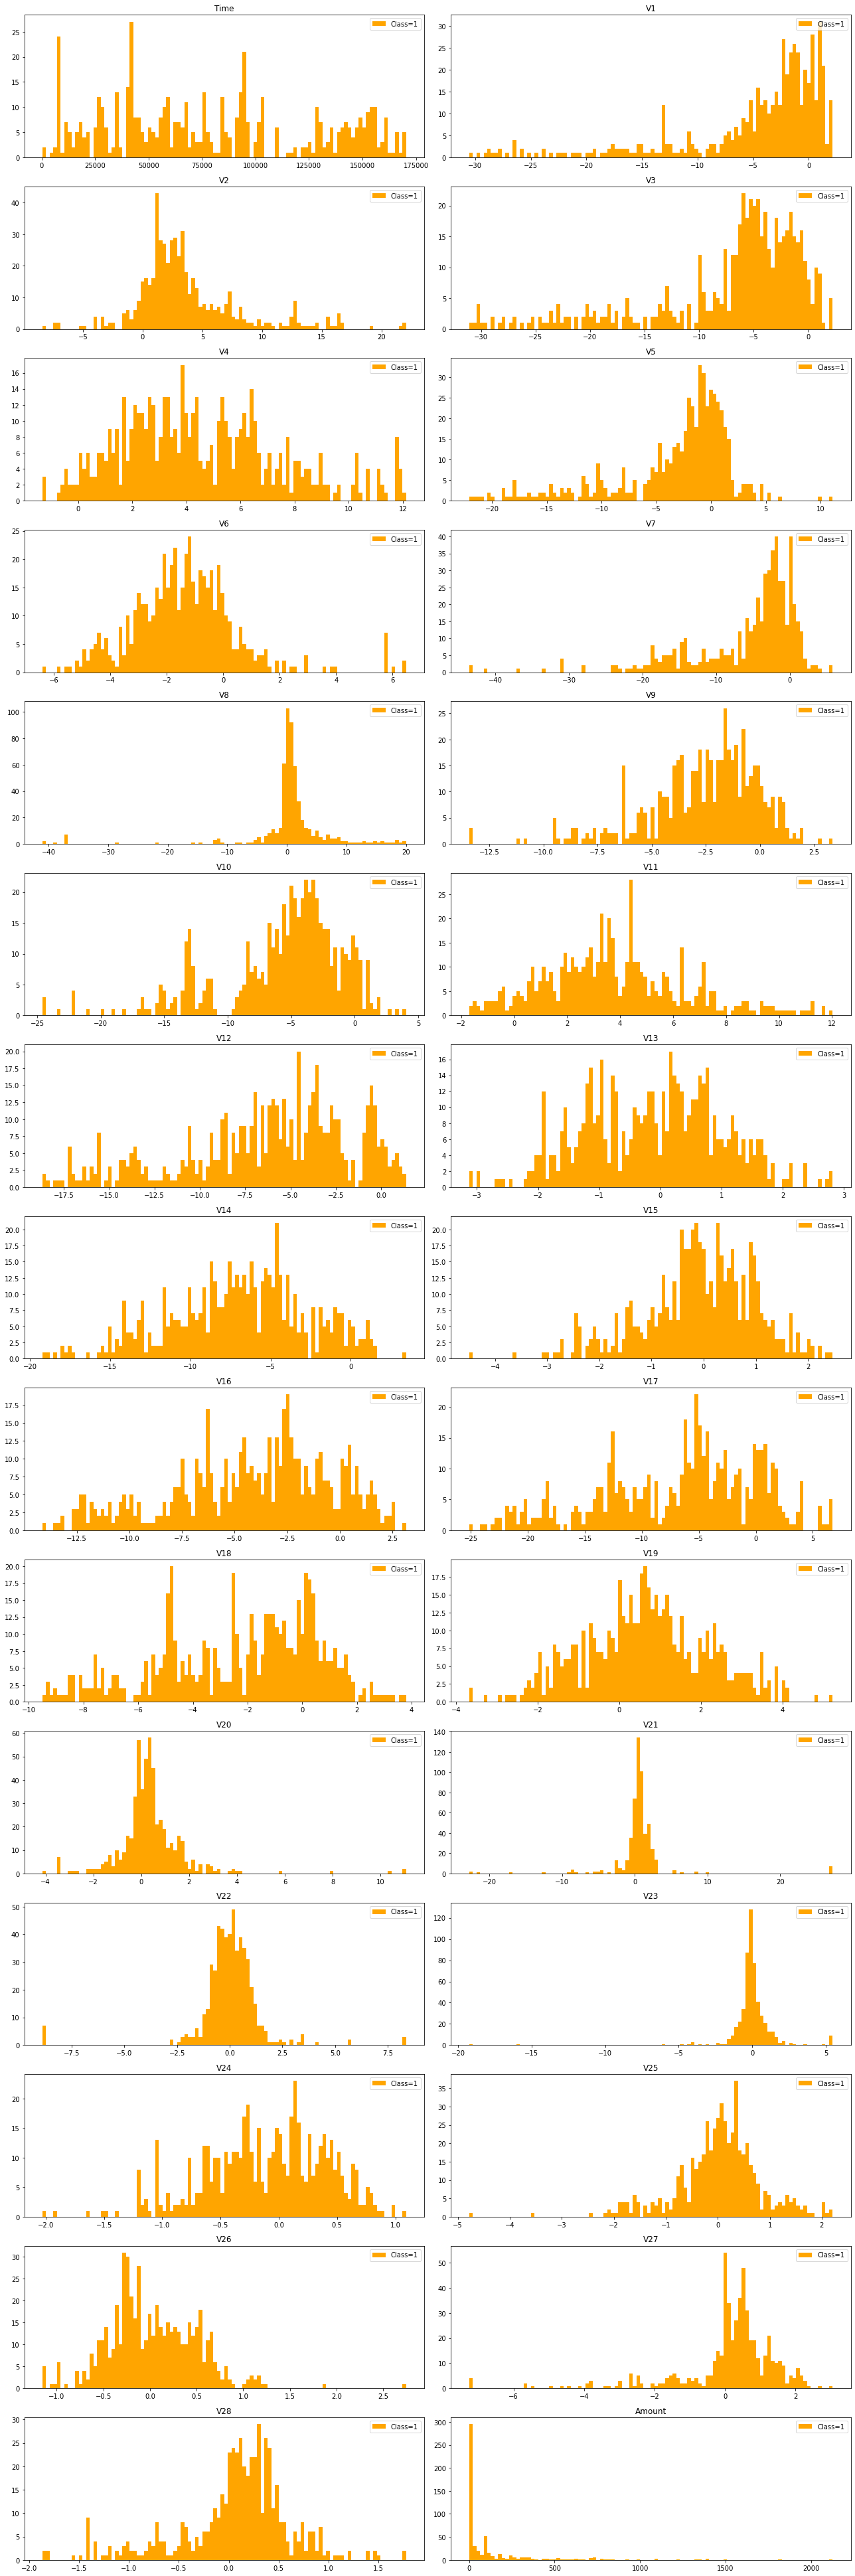

In [50]:
for feat_class in list(df['Class'].unique()):
    feature_plot_class(feat_class)

In [51]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,...,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000
mean,94806.736617,-0.079402,0.064075,-0.119076,0.069642,-0.049576,-0.023362,-0.090812,0.010863,-0.040563,...,0.010357,0.004454,0.000120,-0.002741,-0.001220,0.000640,0.003335,0.002699,87.706952,0.018569
std,47608.786276,2.224369,1.774630,1.970822,1.563285,1.562533,1.349004,1.698689,1.517946,1.188921,...,0.914654,0.751905,0.725573,0.608406,0.527549,0.481168,0.443154,0.337776,227.933924,0.134999
min,10.000000,-35.905105,-38.436817,-31.103685,-5.683171,-22.105532,-16.172614,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-36.666000,-2.836627,-7.495741,-1.715640,-8.260909,-8.307955,0.000000,0.000000
25%,53942.000000,-0.952065,-0.587048,-0.952337,-0.841015,-0.712878,-0.782769,-0.573091,-0.203931,-0.669989,...,-0.227568,-0.540859,-0.160536,-0.356542,-0.318599,-0.327730,-0.070533,-0.053086,5.500000,0.000000
50%,85247.000000,-0.005860,0.081536,0.165161,0.003003,-0.061856,-0.286567,0.029714,0.026311,-0.065615,...,-0.025240,0.010858,-0.010676,0.036750,0.015827,-0.050237,0.002476,0.011402,21.800000,0.000000
75%,139385.000000,1.311895,0.834189,1.002279,0.776804,0.614540,0.386670,0.566372,0.339432,0.583493,...,0.196791,0.537662,0.149429,0.435490,0.349010,0.243383,0.095913,0.079723,78.000000,0.000000
max,172788.000000,2.400724,22.057729,4.187811,12.699542,24.345310,16.614054,25.971058,20.007208,9.099082,...,27.202839,10.503090,18.364472,4.022866,5.541598,3.067907,9.879903,15.374949,6982.670000,1.000000


In [52]:
print(f'Количество наблюдений с Class=1: {round(df["Class"].value_counts()[1] * 100.0 / df["Class"].value_counts()[0], 3)}%') 

Количество наблюдений с Class=1: 1.892%


3-сигмы:

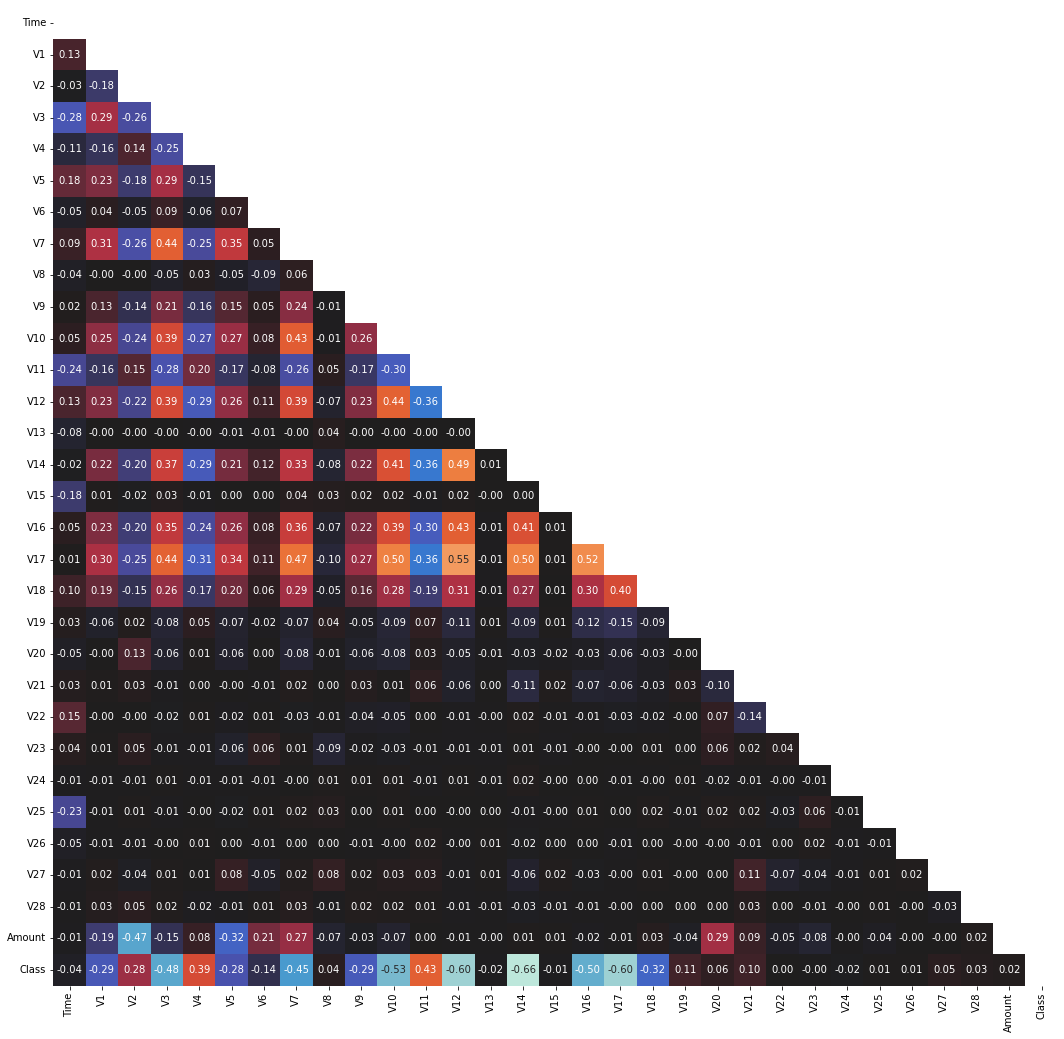

In [53]:
plt.figure(figsize=(18,18))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [54]:
high_corr = []
high_corr_matrix = corr_matrix[((corr_matrix >= 0.2) | (corr_matrix <= -0.2)) & (corr_matrix != 1.000)]
df_corr_matrix = pd.DataFrame(high_corr_matrix.unstack().sort_values(ascending=False).dropna())
for feature_pair in df_corr_matrix.index:
    if feature_pair[0] == 'Class':
        high_corr.append(feature_pair[1])
    if feature_pair[1] == 'Class':
        high_corr.append(feature_pair[0])
high_corr = list(set(high_corr))
print(f'Признаки, наиболее коррелированные с признаком "Class": {high_corr}')
high_corr = ['V17', 'V12', 'V10', 'V14']  # !!!!!!!!!!!!!!!!!!!!

Признаки, наиболее коррелированные с признаком "Class": ['V5', 'V18', 'V17', 'V2', 'V3', 'V12', 'V11', 'V4', 'V1', 'V9', 'V7', 'V16', 'V10', 'V14']


In [55]:
# print(f'Диаграммы распределения для наиболее коррелированных признаков')
# fig, axes = plt.subplots(nrows=int(len(high_corr)/2), ncols=2, figsize=(18, 54))
# axes = axes.ravel()
# for feature_index, ax in enumerate(axes):
#     ax.figure
#     sns.boxplot(x=high_corr[feature_index], y='Class', data=df, hue='Class', orient='h',width=0.2, saturation=0.9, ax=ax);
#     ax.legend(loc='upper right')
#     ax.set_title(high_corr[feature_index])
# plt.tight_layout()
# plt.show()

In [60]:
# high_corr.append('Class')
# high_corr_list = high_corr.copy()
df_high_corr = df[high_corr]
high_corr_class = high_corr.copy()
high_corr_class.append('Class')
df_high_corr_class = df[high_corr_class]

In [61]:
df_high_corr_class

,V17,V12,V10,V14,Class
0,-0.913910,0.013428,0.660153,-0.226384,0
1,-0.068259,-0.362736,0.604018,-0.306893,0
2,0.716960,-0.532465,1.227657,-0.997604,0
3,-0.127242,-0.078659,-0.597999,0.682165,0
4,-0.126313,0.419951,-1.373985,0.088824,0
...,...,...,...,...,...
28968,-0.705604,-0.974532,0.009604,-0.049499,0
28969,-0.984272,0.166809,1.094124,0.354776,0
28970,-0.749190,0.438712,3.378152,-1.606310,0
28971,0.244401,-0.734408,0.706793,-0.432227,0


<Figure size 1152x1152 with 0 Axes>

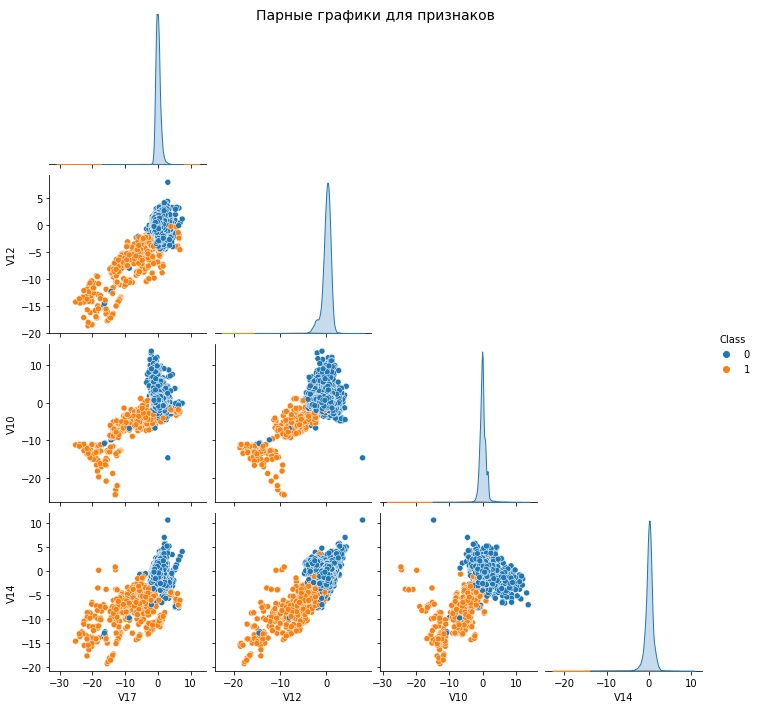

In [63]:
plt.figure(figsize=(16, 16))
sns.pairplot(data=df_high_corr_class, hue='Class', corner=True).fig.suptitle('Парные графики для признаков', fontsize = 14);
plt.show();

In [64]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Число аномалий:\t\t{}\nПроцент аномалий:\t{:.2f}%".format(sum(outliers), 100*sum(outliers)/len(outliers)))    

In [65]:
data_features = df_high_corr #.drop(['Class'], axis=1)
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Число аномалий:		718
Процент аномалий:	2.48%


In [66]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V10,4.290229,-4.472665,490.0,1.691230
V14,4.152177,-4.380526,459.0,1.584234
V17,4.377139,-4.621338,347.0,1.197667
V12,4.135693,-4.351500,345.0,1.190764


С помощью диаграмм размаха:

Диаграммы размаха признаков


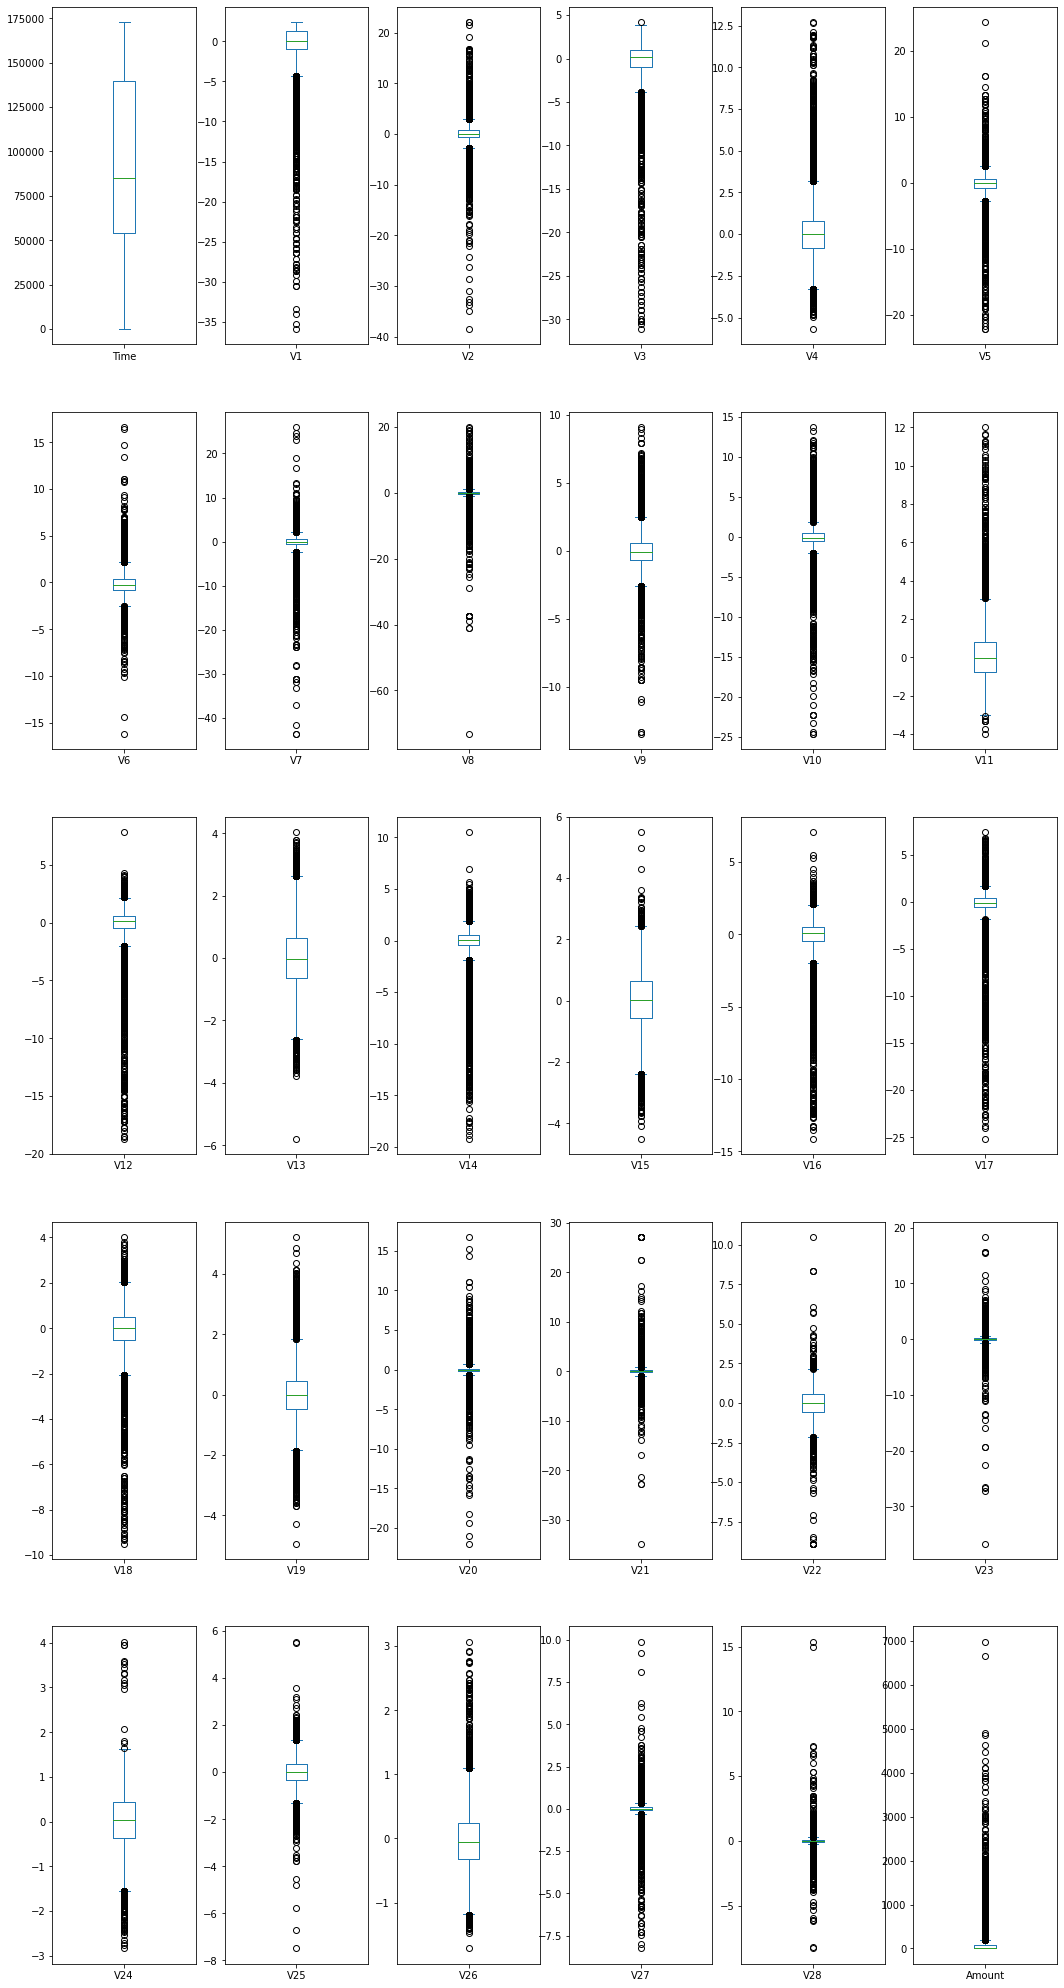

In [67]:
data_features = df.drop(['Class'], axis=1)
fig, axes = plt.subplots(5, 6, figsize=(18, 36))
print('Диаграммы размаха признаков')
row=0
col=0
for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col += 1
    if col > 5:
        row += 1
        col = 0

In [68]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [69]:
data_features = df_high_corr #.drop(['Class'], axis=1)
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Число аномалий:		1028
Процент аномалий:	3.55%


In [70]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V10,3.421240,-3.546101,644.0,2.222759
V14,3.303032,-3.263046,624.0,2.153729
V17,3.062311,-3.183348,480.0,1.656715
V12,3.746230,-3.574073,455.0,1.570428


С помощью кластеризации:

In [71]:
def elbow_checker(cluster_model, X):
    sns.reset_orig()
    k_max = 11
    inertia = []
    for k in range(1, k_max):
        kmeans = cluster_model(n_clusters=k).fit(X)
        inertia.append(np.sqrt(kmeans.inertia_))

    plt.figure(figsize=(16, 8))
    plt.plot(range(1, k_max), inertia, marker='x')

    plt.xlabel('Количество кластеров k')
    plt.ylabel('Инерция')
    plt.grid()
    plt.show()

In [72]:
def silhouette_checker(cluster_model, X):
    k_max = 6
    silhouette = []
    for k in tqdm(range(2, k_max)):
        agg = cluster_model(n_clusters=k).fit(X)
        labels = agg.labels_
        score = silhouette_score(X, labels)
        silhouette.append(score)
    plt.figure(figsize=(16, 8))
    plt.plot(range(2, k_max), silhouette, marker='x');
    plt.grid()

In [73]:
scaler = MinMaxScaler()
scaler = scaler.fit(df_high_corr)
df_normalized = scaler.fit_transform(df_high_corr)
df_normalized = pd.DataFrame(df_normalized, columns=df_high_corr.columns)

In [74]:
df_normalized

,V17,V12,V10,V14
0,0.743430,0.704699,0.658959,0.638441
1,0.769356,0.690521,0.657494,0.635734
2,0.793430,0.684124,0.673770,0.612510
3,0.767548,0.701228,0.626122,0.668990
4,0.767576,0.720021,0.605870,0.649040
...,...,...,...,...
28968,0.749816,0.667462,0.641980,0.644389
28969,0.741273,0.710480,0.670285,0.657982
28970,0.748480,0.720728,0.729896,0.592043
28971,0.778942,0.676513,0.660176,0.631520


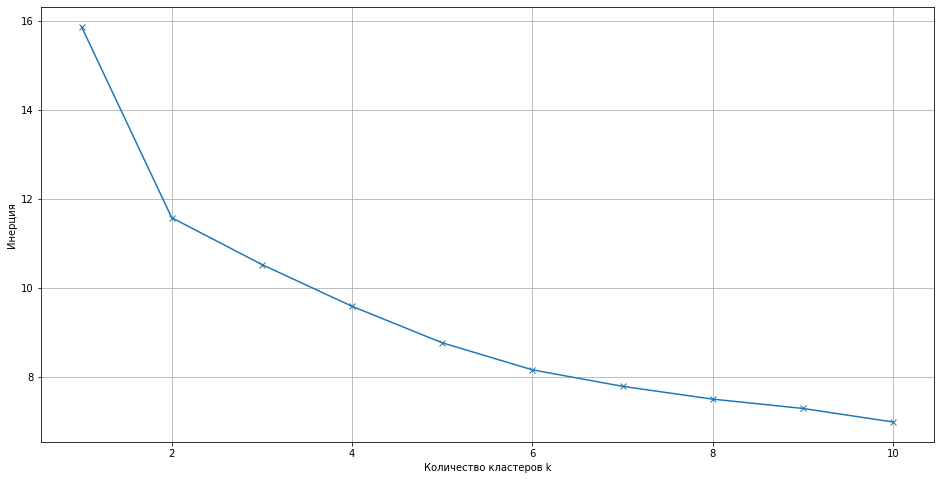

In [75]:
elbow_checker(KMeans, df_normalized)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:36<00:00,  9.12s/it]


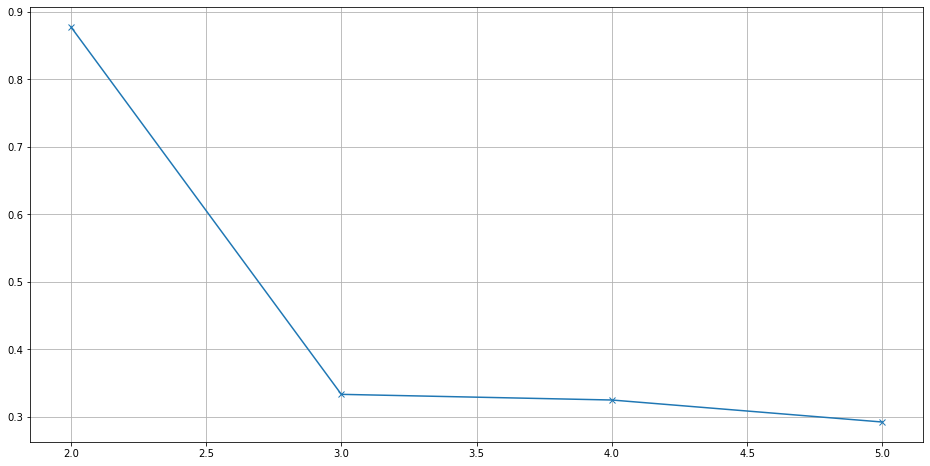

In [76]:
silhouette_checker(KMeans, df_normalized)

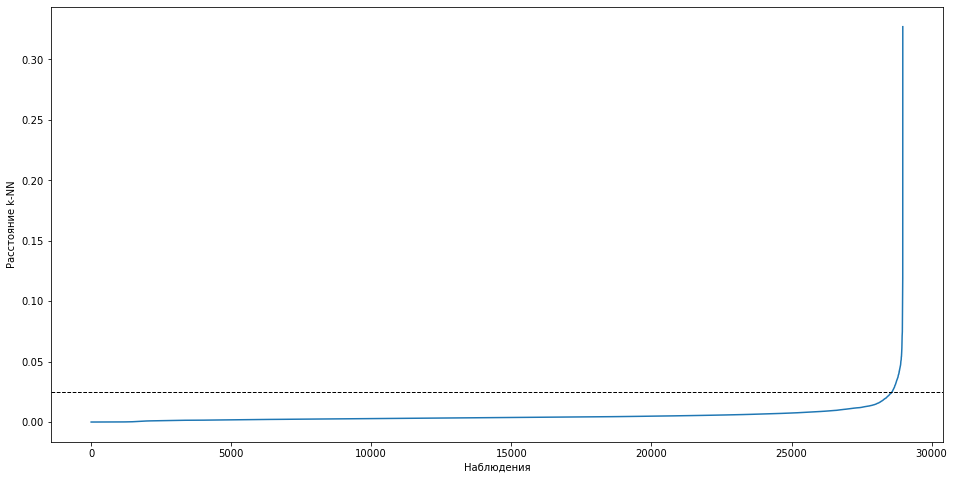

In [79]:
nbrs = NearestNeighbors(n_neighbors=df_normalized.shape[1] + 1).fit(df_normalized)  #.drop(columns=['Class'], axis=1)
neigh_dist, neigh_ind = nbrs.kneighbors(df_normalized)  #.drop(columns=['Class'], axis=1)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 1]
plt.figure(figsize=(16, 8))
plt.plot(k_dist)
plt.axhline(y=0.025, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("Расстояние k-NN")
plt.xlabel("Наблюдения")
plt.show()

In [102]:
eps_list=np.arange(start=0.1, stop=0.16, step=0.01)
min_sample_list=np.arange(start=2, stop=df_normalized.shape[1], step=1)

silhouette_scores_data=pd.DataFrame()
silhouette = []
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        if(len(np.unique(db.fit_predict(df_normalized))) > 1):  #.drop(['Class'], axis=1)
            sil_score=silhouette_score(df_normalized, db.fit_predict(df_normalized)) #.drop(['Class'], axis=1)
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(3)) +" min_sample:" + str(min_sample_trial)
        silhouette_scores_data = pd.concat([pd.DataFrame([[sil_score,trial_parameters]], columns=["score", "parameters"]), silhouette_scores_data], ignore_index=True)

In [103]:
score_parameters = silhouette_scores_data.sort_values(by='score', ascending=False).head(1)
best_eps = float(score_parameters['parameters'][0].split(' ')[0].split(':')[1])
best_pts = int(score_parameters['parameters'][0].split(' ')[1].split(':')[1])
print(f'Лучшие параметры:')
print(score_parameters)

Лучшие параметры:
      score             parameters
0  0.884846  eps:0.15 min_sample:3


In [110]:
dbscan = DBSCAN(eps=0.12, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df_normalized)  #.drop(columns=['Class'], axis=1)

In [109]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(f'Количество записей каждого кластера: {dict(zip(unique, counts))}')

Количество записей каждого кластера: {-1: 11, 0: 28871, 1: 80, 2: 5, 3: 6}


In [111]:
kmeans = KMeans(n_clusters=2, random_state=97)
df['kmeans_cluster'] = kmeans.fit_predict(df_normalized)

In [112]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,kmeans_cluster,dbscan_cluster
0,147682.0,-0.351113,1.270114,-0.486631,-0.670420,0.946421,-0.767365,1.186568,-0.636150,0.569428,...,-0.307061,-0.666650,-0.213594,-0.180595,-0.236744,0.007099,3.63,0,1,0
1,43006.0,1.381928,-0.523250,-0.167082,-0.811498,-0.490233,-0.659577,-0.243027,-0.307704,-0.997519,...,-0.277220,-0.389876,0.757129,-0.073438,-0.010581,0.013505,65.00,0,1,0
2,77598.0,1.377441,-1.392637,1.199127,-1.077220,-2.151707,-0.341421,-1.499293,0.001459,-1.070695,...,0.030003,0.394365,0.241177,-0.200487,0.073175,0.039906,52.00,0,1,0
3,82411.0,-0.378428,1.034512,0.424507,0.161931,-0.278660,-1.125367,0.652295,0.189762,-0.666478,...,0.060700,0.397526,-0.201165,0.261209,-0.137909,-0.032786,42.81,0,1,0
4,79734.0,-2.052239,0.405091,1.752122,-0.593583,-0.958570,-0.739725,-0.671108,0.926478,-0.049416,...,-0.170487,0.474714,0.269813,1.024385,-0.340131,-0.231333,2.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,33017.0,-0.844345,0.163812,2.047571,0.463525,0.723397,1.614867,-0.195528,0.418863,0.342181,...,-0.336260,-1.745474,0.423994,-0.029455,-0.143863,-0.185574,0.01,0,1,0
28969,89450.0,2.033631,-1.017637,-1.875568,-0.775094,-0.019797,-0.144489,-0.246832,-0.204580,-0.797730,...,-0.149762,-1.343199,0.048333,0.848606,-0.086100,-0.069029,114.85,0,1,0
28970,37003.0,-2.896247,2.597098,0.774507,-1.895414,-0.422703,-0.872075,0.934692,-0.326533,2.534413,...,0.006653,0.418973,0.029592,0.554906,-0.434651,-1.302685,6.07,0,1,0
28971,119414.0,0.079430,0.222747,0.323605,-1.431498,0.454940,-0.578681,0.672104,-0.566030,-1.452270,...,-0.355201,0.767002,-0.205101,0.104334,-0.113218,-0.050061,25.00,0,1,0


In [114]:
tsne = TSNE(n_components=2, random_state=10, init='random', learning_rate='auto')
df_tsne_class = tsne.fit_transform(df.drop(columns=['kmeans_cluster', 'dbscan_cluster'], axis=1))
df_tsne_kmeans = tsne.fit_transform(df.drop(columns=['Class', 'dbscan_cluster'], axis=1))
df_tsne_dbscan = tsne.fit_transform(df.drop(columns=['Class', 'kmeans_cluster'], axis=1))

In [119]:
plot_palette = 'viridis'

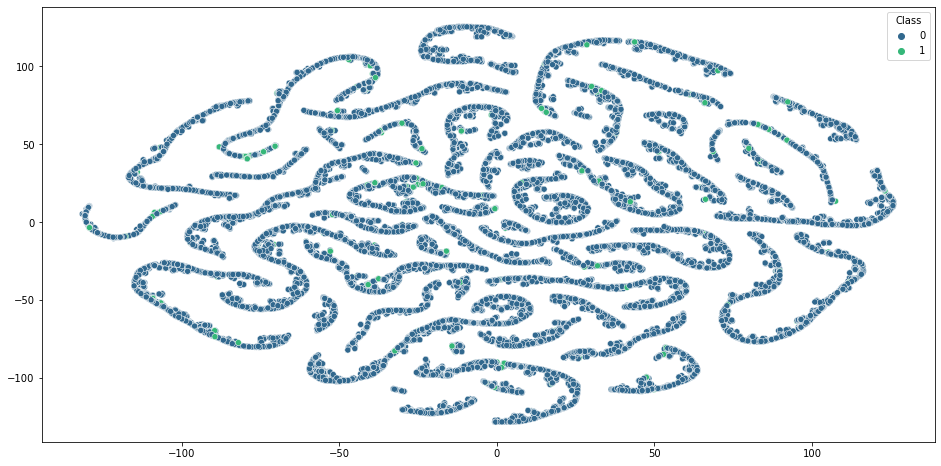

In [120]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_tsne_class[:,0], y = df_tsne_class[:,1], hue=df['Class'], palette=plot_palette);

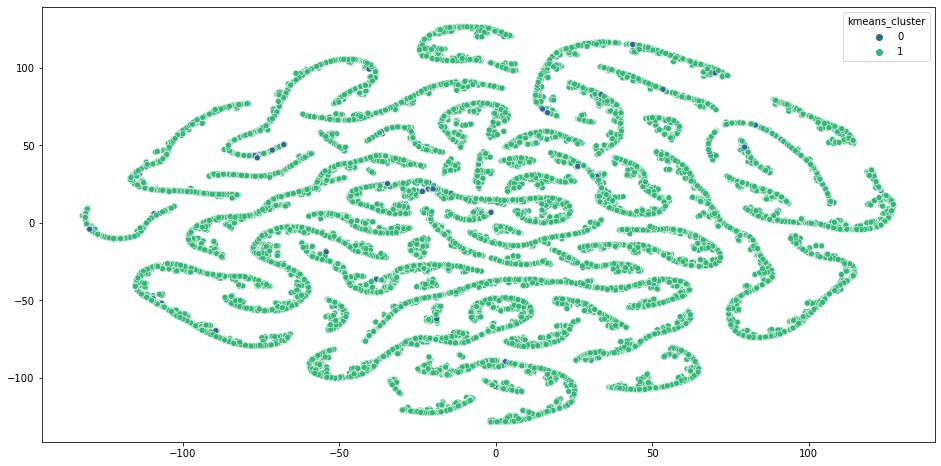

In [123]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_tsne_kmeans[:,0], y = df_tsne_kmeans[:,1], hue=df['kmeans_cluster'], palette=plot_palette);

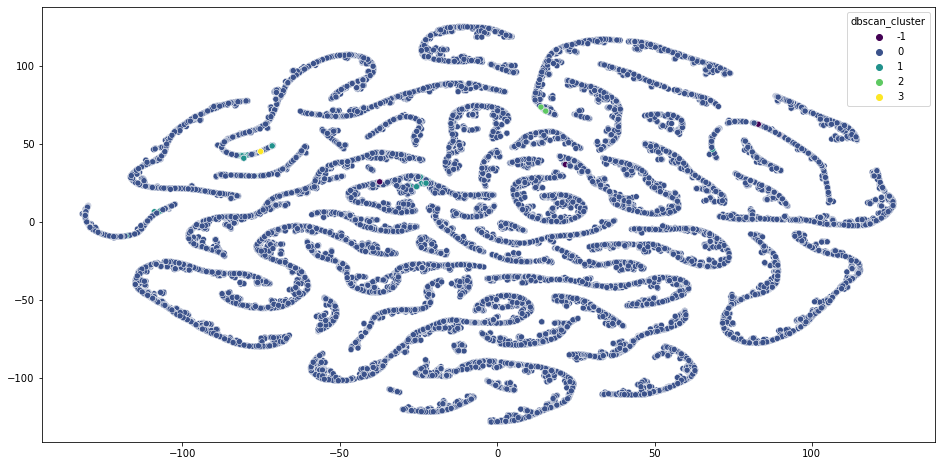

In [124]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_tsne_dbscan[:,0], y = df_tsne_dbscan[:,1], hue=df['dbscan_cluster'], palette=plot_palette);

In [127]:
ump = umap.UMAP(random_state=42)
df_umap_class = ump.fit_transform(df.drop(columns=['kmeans_cluster', 'dbscan_cluster'], axis=1))
df_umap_kmeans = ump.fit_transform(df.drop(columns=['Class', 'dbscan_cluster'], axis=1))
df_umap_dbscan = ump.fit_transform(df.drop(columns=['Class', 'kmeans_cluster'], axis=1))

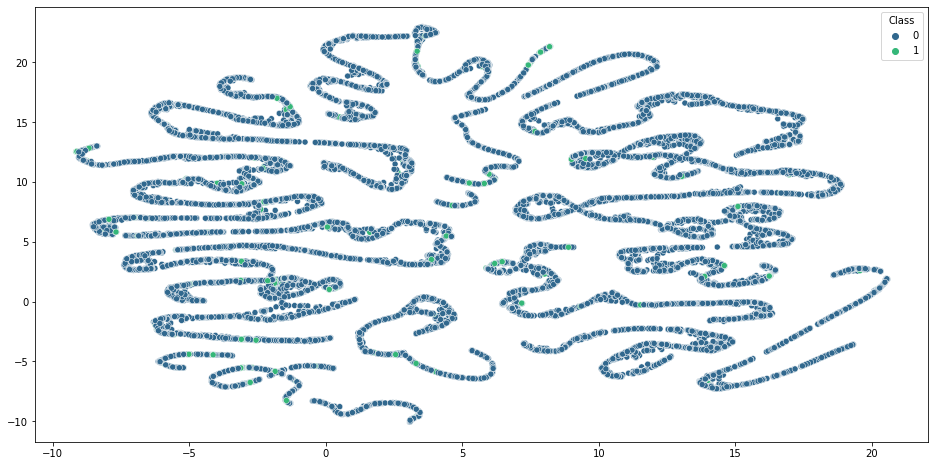

In [128]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_umap_class[:,0], y = df_umap_class[:,1], hue=df['Class'], palette=plot_palette);

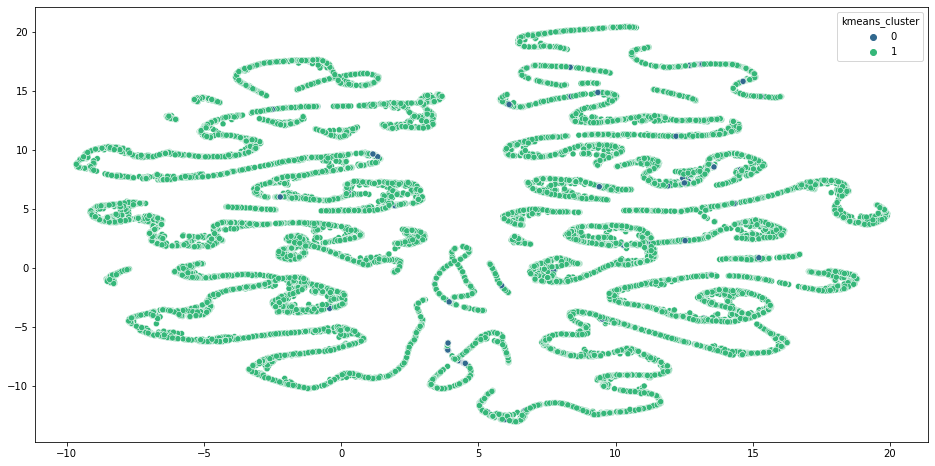

In [129]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_umap_kmeans[:,0], y = df_umap_kmeans[:,1], hue=df['kmeans_cluster'], palette=plot_palette);

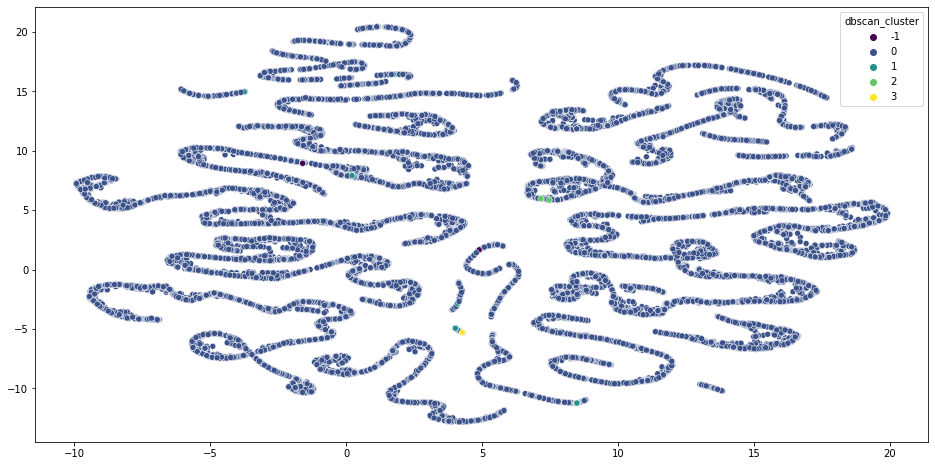

In [130]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = df_umap_dbscan[:,0], y = df_umap_dbscan[:,1], hue=df['dbscan_cluster'], palette=plot_palette);

In [132]:
one_class_svm = OneClassSVM(nu=0.10, gamma='auto')
one_class_svm.fit(df_normalized)
svm_outliers = one_class_svm.predict(df_normalized)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [133]:
anomalies_report(svm_outliers)

Число аномалий:		2898
Процент аномалий:	10.00%


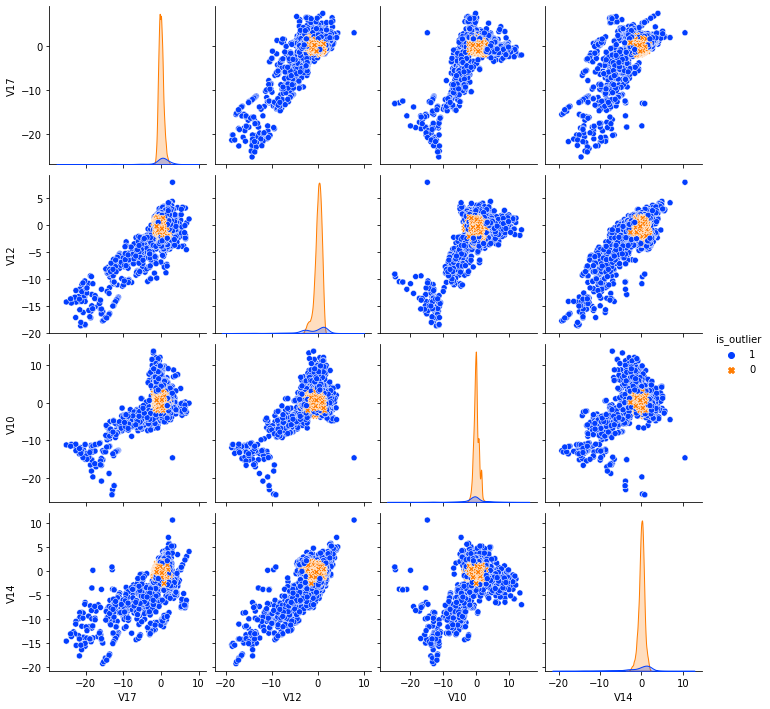

In [136]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = svm_outliers

sns.pairplot(data=labeled_data, vars = df_normalized,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

In [138]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(df_normalized)

isolation_outliers = isolation_forest.predict(df_normalized)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

D:\Dev\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [139]:
anomalies_report(isolation_outliers)

Число аномалий:		2898
Процент аномалий:	10.00%


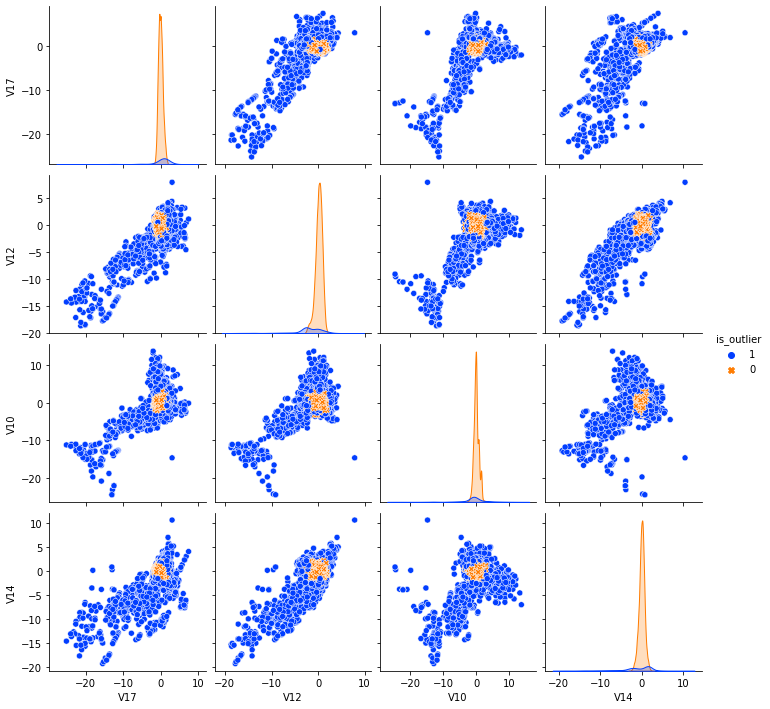

In [141]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = isolation_outliers

sns.pairplot(data=labeled_data, vars = df_normalized,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');